# HOMEWORK 1: PCA
<br>
Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

# Problem 1
Re-implement PCA by using numpy.
### Implementation

In [1]:
import numpy as np

class MyPCA:
    def __init__(self, ncomponents=2):
        self.ncomponents = ncomponents
        self.original_data = None
        self.data = None
        self.B = None
        
    def fit(self, data):
        # flatten the data if necessary
        self.original_data = data
        self.data = np.array([x.ravel() for x in data], dtype='float')
        
        # cenetering by substracting the mean from each datapoint
        self.data = self.data - np.mean(self.data, axis=0)
        
#         # dividing by the standard deviation
#         std = np.std(self.data, axis=0)
#         std_modified = np.array([0 if x==0 else 1/x for x in std]) 
#         # std=0 means all values are constant --> scaling factor=0 --> standardized value=0
#         self.data = self.data*std_modified
        
        # compute the covariance matrix
        cov = np.cov(self.data, rowvar=False)
        
        # compute eigenvalues and eigenvectors of the covariance matrix
        eigval, eigvec = np.linalg.eigh(cov, UPLO='U')
        
        # sort the eigenvalue in decsending order
        eigvalsorted_index = np.argsort(eigval)[::-1]
        self.B = eigvec[:, eigvalsorted_index[:self.ncomponents]]
    
    def transform(self, data):
        self.reduced = self.data.dot(self.B)
        return self.reduced
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(self.data)

### Testing using Iris dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris_package = load_iris()
iris_data = iris_package.data
iris_target = iris_package.target

<Axes: xlabel='PC1', ylabel='PC2'>

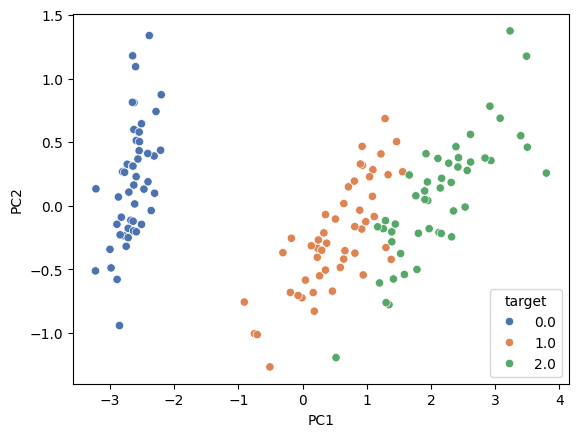

In [3]:
import seaborn as sns

pca = MyPCA(2)
iris_reduced = pca.fit_transform(iris_data)
iris_final = np.concatenate([iris_reduced, iris_target.reshape(-1, 1)], axis=1)
iris_pd = pd.DataFrame(data=iris_final, columns=['PC1', 'PC2', 'target'])
sns.scatterplot(data=iris_pd, x='PC1', y='PC2', hue='target', palette='deep')

# Problem 2
Load MNIST dataset (preferably from keras, but you can use sklearn if you want). Visualize the image. Then use PCA to reduce the dimensity of the data and visualize all the data.

### Visualize the image

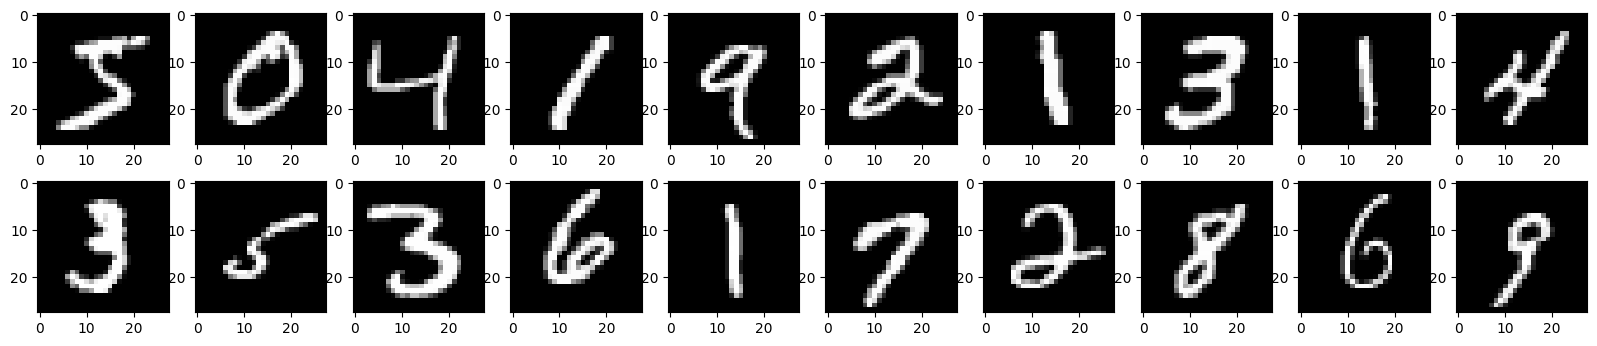

In [4]:
# load dataset
from keras.datasets import mnist

# mnist data set has already been splitted into train set and test set.
# train set contains 60,000 data points while test set contains 10,000 data point
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# Plot the first 20 datapoint
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

### Reduce the dimensity of the data and visualize

<Axes: xlabel='PC1', ylabel='PC2'>

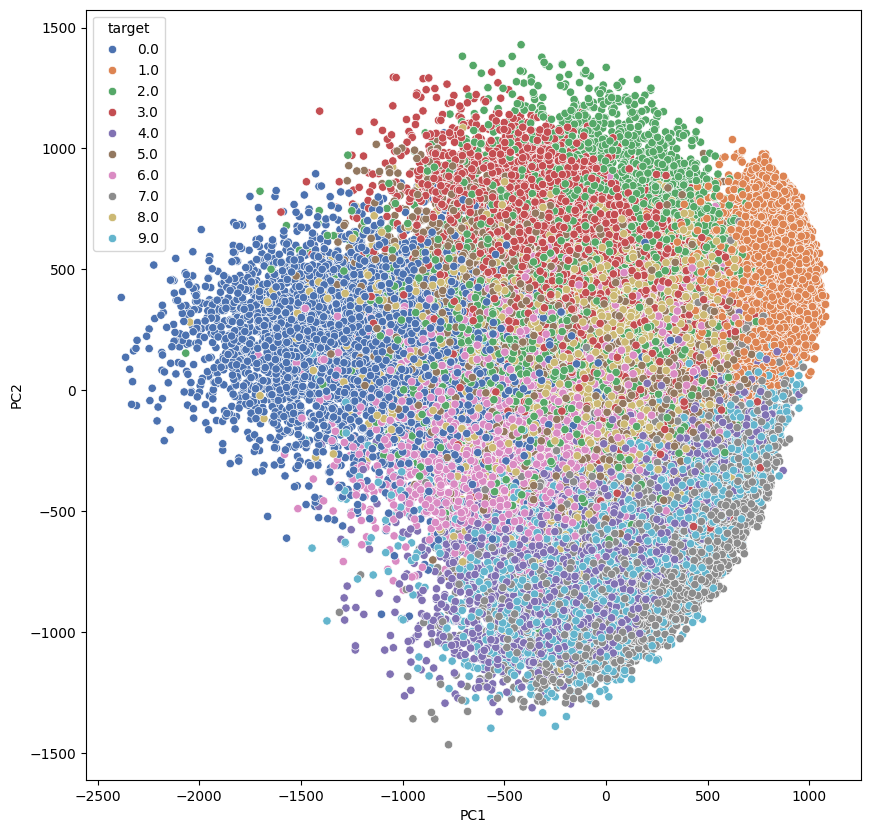

In [5]:
pca = MyPCA(2)
X_reduced = pca.fit_transform(X)
X_final = np.concatenate([X_reduced, y.reshape(-1, 1)], axis=1)
X_pd = pd.DataFrame(data=X_final, columns=['PC1', 'PC2', 'target'])
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_pd, x='PC1', y='PC2', hue='target', palette='deep')